# Human Resource Analytics.
HR Analytics also known as people analytics, is the use of people-data in analytical processes to solve business problems. HR analytics uses both people-data, collected by HR systems (such as payroll, absence management) and business information (for example, operations performance data)

## Problems addresed by HR analytics
- Hiring/Assessment
- Retention 
- Performance evaluation
- Learning and Development 
- Collaboration/team composition Other (e.g.	absenteeism)


## Churn
This is when a member of the population(employee) leaves the population(business).
### Employee churn analysis
* Desribes the depature of an interlectual asset from the organization.
* Employee churn has unique dynamics compared to customer churn. It helps us in designing better employee retention plans and improving employee satisfaction. Data science algorithms can predict the future churn

## Explolatory data analysis
Involves descriptive statistics and visualization.

## importing necessary modules
import pandas as pd # for data-frames
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for ploting graphs 

#### changing working directory

In [5]:
cd H:/TUSHIAZ/stat books # cahnge working directory

H:\TUSHIAZ\stat books


#### Loading data

In [6]:
# Loading data
data=pd.read_csv('HR_data.csv')
data.head()#the first five 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



Knowing a little bit about the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Departments              14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- The data has 10 variables and 14999 cases
- we have no missing values
- 2 are floats, 6 integers and 2 strings
- We need to transform the string variables to numerics

confirmin the missing values

In [42]:
data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Departments              False
salary                   False
dtype: bool

## Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics

In [13]:
obcol = ['salary','Departments']

In [15]:
left=data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.347742
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.345842


Here you can interpret, Employees who left the company had low satisfaction level, low promotion rate, low salary, and worked more compare to who stayed in the company.

### variable descriptive statistics

In [16]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,2.000000


In [17]:
data.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
0,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
1,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
2,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


# Data Visualization

Let's check how many employees were left?

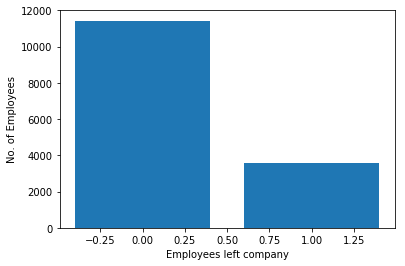

In [20]:
# Plot the left column
left_cnt= data.groupby('left').count()
plt.bar(left_cnt.index.values, left_cnt['satisfaction_level'])
plt.xlabel('Employees left company')
plt.ylabel('No. of Employees')
plt.show()

You can see out of 14,999 employees, 3,571 left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

In [22]:
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

### salary turnovers

You can also plot a bar graph to count the number of employees deployed on salary levals?

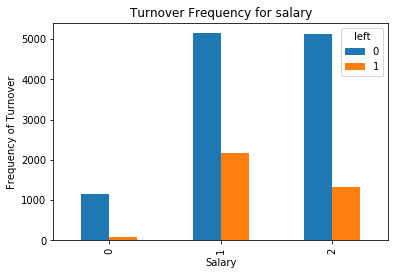

In [28]:
%matplotlib inline
pd.crosstab(data.salary,data.left).plot(kind='bar')
plt.title('Turnover Frequency for salary')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

Most of the employees are getting salary either medium or low.
- 0 = high
- 1 = medium
- 2 = low

### Time Spent in Company
Similarly, you can also plot a bar graph to count the number of employees have based on how much experience

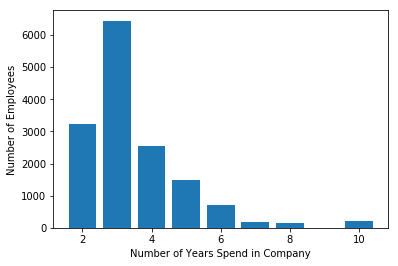

In [32]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

#### Subploting

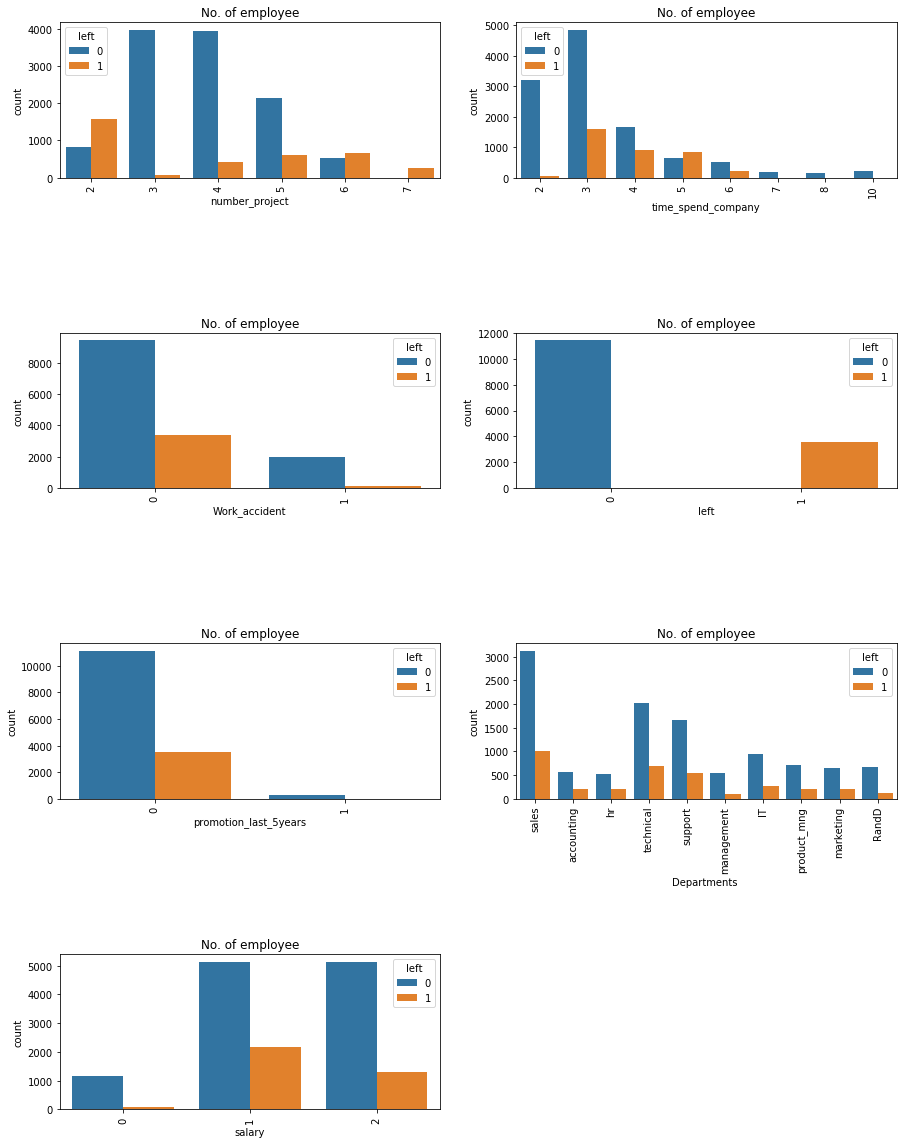

In [35]:
#plot several subplots using seaborn
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data,hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

You can observe the following points in the above visualization:

   - Those employees who have the number of projects more than 5 were left the company.
   - The employee who had done 6 and 7 projects, left the company it seems to like that they were overloaded with work.
   - The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.
   - Those who promotion in last 5 years they didn't leave, i.e., all those left they didn't get the promotion in the previous 5 years.


## Cluster analysis
Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [36]:
#import module
from sklearn.cluster import KMeans
# Filter data
# satisfaction level and last evaluation for the people who left
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

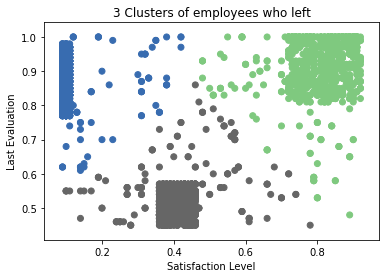

In [37]:
# Add new column "label" and assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

Here, Employee who left the company can be grouped into 3 type of employees:

 -   High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
 -  Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
 - Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.


C:\Users\damaris\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


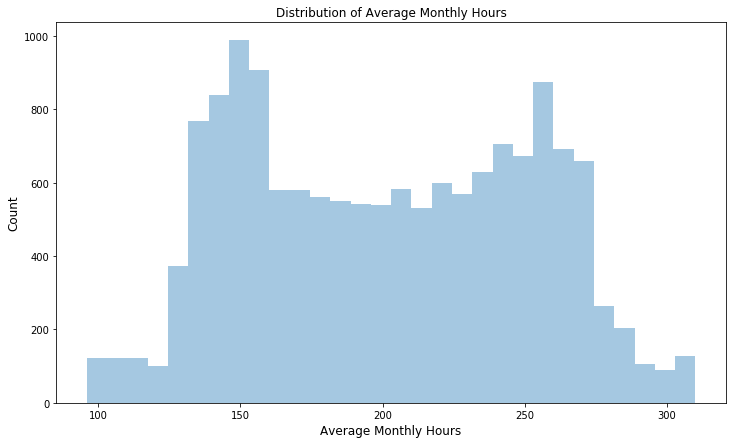

In [38]:
plt.figure(figsize=(12,7))
sns.distplot(data.average_montly_hours,bins=30,kde=False)
plt.title("Distribution of Average Monthly Hours")
plt.xlabel("Average Monthly Hours",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()



From the plot,it is understood that the curve is bimodal with peaks at around 150 and 280.This means that the average monthly working hours of most people is 150 hrs and 280 hrs

Text(0.5,1,'Employee Turnover with Average Monthly Hours')

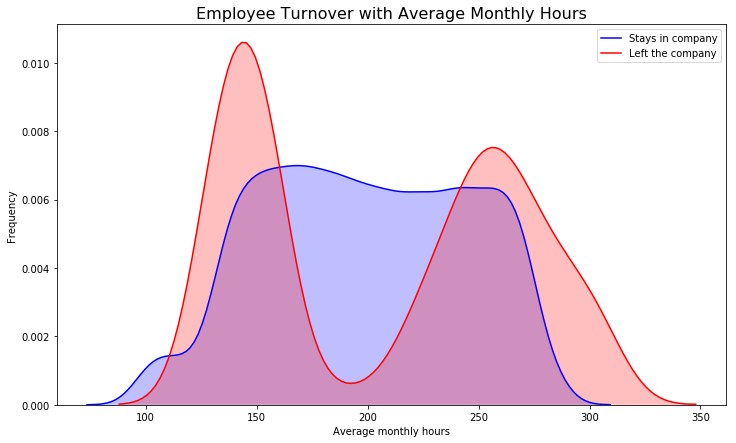

In [39]:
plt.figure(figsize=(12,7))
ax=sns.kdeplot(data.loc[(data.left==0),'average_montly_hours'],color="b",shade=True,label="Stays in company")
ax=sns.kdeplot(data.loc[(data.left==1),'average_montly_hours'],color="r",shade=True,label="Left the company")
ax.set(xlabel='Average monthly hours',ylabel="Frequency")
plt.title("Employee Turnover with Average Monthly Hours",fontsize=16)

 From the plot,it is understood that there is an increasing trend of turnover for employees who work for 150 hrs on an monthly average and this trend is replicated for 250 average monthly working hours.

The same trend is observed for those who do not leave the company but the frequency difference is higher for those who work for 150 avg monthly hours than who work for 250 avg monthly hours.

                                                                                   Dennis Kevogo